In [17]:
import pymysql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

db = pymysql.connect(host='localhost', 
                     port=3306, 
                     user='root', 
                     passwd='3306', 
                     db = 'progammers_da', 
                     charset='utf8')


cursor = db.cursor()

# 필요 리스트 생성
year_month = []
sum = []
products = []


# 년월 항목 추출
sql = "SELECT date_format(InvoiceDate, '%y-%m') as month from adidas group by 1 order by 1;"
cursor.execute(sql)


# 년월 year_month에 저장
for month in cursor:
    year_month.append(','.join(month))


In [18]:
# 제품 항목 추출
sql = "select product from adidas group by 1 order by 1;"
cursor.execute(sql)


# 제품항목 products에 저장
for product in cursor:
    products.append(','.join(product))


In [19]:
# 년월, 제품항목, 판매량 추출
sql = "SELECT date_format(InvoiceDate, '%y-%m') as month, Product, avg(UnitsSold) FROM adidas group by 1, 2 order by month, Product;"
cursor.execute(sql)


# 판매량 저장
for line in cursor:
    sum.append(int(line[2]))


In [20]:
# 판매량의 1차원 배열을 년월 기준으로 2차원 배열로 재구성
np_sum = np.array(sum)
np_sum = np_sum.reshape(len(sum) // 6, 6)


In [21]:
# np_sum 순서 변경
data = [[np_sum[j][i] for j in range(len(np_sum))] for i in range(len(np_sum[0]))]


x_labels = year_month
x_values = list(range(1, len(data[0]) + 1))


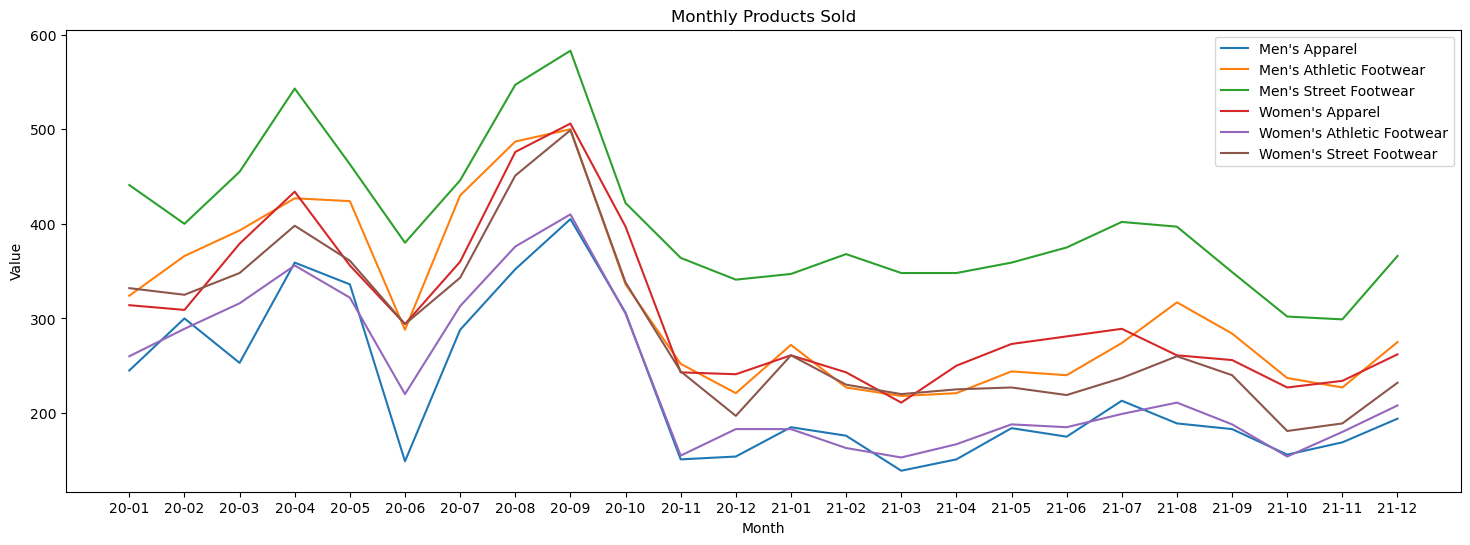

In [30]:
# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# 그래프
for i in range(len(data)):
    plt.plot(x_values, data[i], label=products[i])

plt.title('Monthly Products Sold')
plt.xlabel('Month')
plt.ylabel('Value')

# x 축 레이블 설정
plt.xticks(x_values, x_labels)

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


In [24]:
# 종료
cursor.close()
db.close()
